##           random forest explanation
#### to first understand the random forest algorithm we first need to understand what is a decision tree well suppose you have a full of students in a class and 
### they have different hights
### different age
### different skin color
### different sex (male and female actually)
### and different eating test
### different skill

#### suppose there is a student name alex who is 5 foot 3 inch tall,16 years old,color white,male,like pizza,and good in electronics

### now lets first devide the student in two groups based on hights 
### 30 is less than 5 foot and 40 greater than  5 foot
### so our students (consider as a root of the tree) divided in to two branchs
### now lets divide the two branchs in to based age now we got two multiply two four branchs
### now based on skin color we divide it further we got eight branch
### then we make the brunch further
### now after doing this at the end we can easily find alex

### my example can be done by simple nested if else statement and 
### if we dont follow the order of the condition this may be the different but that also give us the right alex.


### now random forest algorithm

### now if the data have a lot of parameters and we made different different classifier based on dicission tree we will get a lot of tree that means we got a forest
### now based on these classifieeres we can make accurate dicision beause we have a lot of classifers here now how do i make a regression and classification


#### you dont have to understand the following justit is good if you under stand

### well in clase of classification we take the most occuring  event in the classifier
### and in case of regression we take the mean value just that

# this is random forest
### example will be based on the sklearn

#           we predict the temareture using random forest

In [1]:
##lets import data and then see what we have got
import pandas as pd

In [2]:
fetures = pd.read_csv('temps.csv')

In [3]:
fetures.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [4]:
## we have year is 2016 all the data of the year
## months month of the year
## day of each months
## week means actually which day that is (dont know why they call it a week)
## temp1 is max temerature in 2 days prior
## temp2 is max tempareture in 1 days prior 
## average is the avg temp
## acctual measurement temp
##and next three is the three company prediction
## and the last is the prediction of your dumb ass friend

In [5]:
## lets find the shape of the data looks like it is not a very big datasets
print "size of the data ",fetures.shape

size of the data  (348, 12)


In [6]:
fetures.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [7]:
## all the things you need to know
import matplotlib.pyplot as plt

In [8]:
X=fetures['month']
Y=fetures['actual']

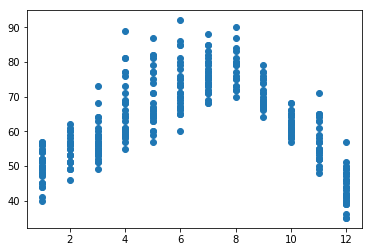

In [9]:
plt.scatter(X,Y)

## well thats not very bad we just see the actual temapeture of the whole year just see the data thats it

In [10]:
### now we are doing some wired shit

### remember when i tell you that we create disicion tree with different different 
### criteria.if we increase the day of the week as the matrix er can classify more based on each day
### it will be like this when it is monday only the monday will be 1 and antherall other field is zero


# we convert this 


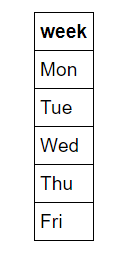

In [11]:
from IPython.display import Image
Image(filename='first.png')

# to this

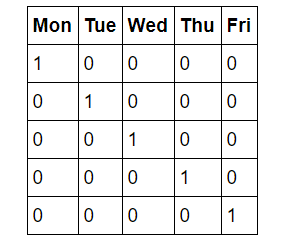

In [12]:
Image(filename='second.png')

In [13]:
##So, if a data point is a Wednesday, 
##it will have a 1 in the Wednesday column and a 0 in all other columns. 
##This process can be done in pandas in a single line!

In [14]:
## get dummies is a great function to do this
fetures=pd.get_dummies(fetures)

In [15]:
fetures.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [16]:
# works like magic it acctually work with the dataframe with the string then convert it to a binary matrix
# as simple as that

In [17]:
## lets start calculation
import numpy as np


In [18]:
## lets separate the column that we predict
labels=np.array(fetures['actual'])

In [19]:
##we get out Y now lets drop it we dont need it
fetures1=fetures.drop('actual',axis=1) ## axis=1 means columns


In [20]:
## convert it to numpy array before that lets store it in another variable
## now you can do it in two way create a data frame in pandaas and store it or
## convert it to a list and store it
fetures_list=list(fetures1.columns)

In [21]:
## convert the feture to numpy array
fetures1=np.array(fetures1)

In [22]:
### train and test the data but to do that we have to split the data
### for training and testing 
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(fetures1,labels,test_size=.25)

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
## lets train the model by creating 1000 trees

## instantiate the model
rf=RandomForestRegressor(n_estimators=1000)

In [26]:
rf.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [27]:
accuracy=rf.score(X_test,Y_test)

In [28]:
print accuracy

0.8134215229470754


In [29]:
predictions=rf.predict(X_test)

In [30]:
predictions

array([70.842, 73.47 , 54.573, 47.689, 61.914, 62.998, 66.339, 49.788,
       58.74 , 64.925, 40.843, 75.978, 66.534, 80.452, 64.924, 49.202,
       64.396, 64.853, 77.862, 60.288, 50.517, 68.92 , 73.784, 75.104,
       44.28 , 62.205, 60.874, 61.365, 70.942, 64.957, 67.323, 54.105,
       56.873, 41.538, 72.881, 48.567, 75.515, 76.775, 52.008, 71.85 ,
       62.974, 75.724, 63.1  , 53.557, 47.604, 77.133, 71.57 , 61.423,
       55.729, 76.016, 76.988, 56.242, 81.163, 70.392, 50.098, 56.401,
       57.396, 73.799, 74.442, 73.083, 50.867, 60.847, 61.43 , 79.744,
       76.756, 72.639, 54.425, 52.484, 56.884, 71.597, 60.08 , 50.219,
       45.326, 81.778, 39.095, 64.552, 42.163, 55.546, 72.328, 60.331,
       54.376, 47.654, 60.721, 64.107, 59.742, 61.786, 57.109])

In [31]:
df=pd.DataFrame(predictions)


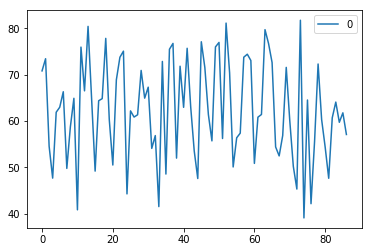

In [36]:
df.plot()


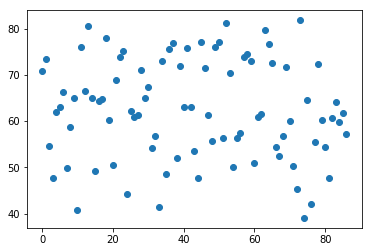

In [33]:
plt.scatter(range(len(df.index)),df)

In [34]:
## thats it for now looser